**INSTALLING DEPENDENCIES**

In [ ]:
!pip install dice-ml
!pip install scikit-learn-extra

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 624kB 2.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=342086 sha256=a57d7498a3a7db7797301effe5b671d0276e6c1a6f19f45ce4a2e62aaad394e9
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_digits
from sklearn.datasets.samples_generator import make_blobs 

mpl.style.use(['ggplot'])
plt.style.use(['seaborn-whitegrid'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# About Dataset

**Here we will use a adult_income dataset for predicting customer income.**

**income is close or less than 0.5 ,person is not earning high income**

**income is close or greater than 0.5 ,person is earning high income**

In [ ]:
import dice_ml
from dice_ml.utils import helpers # helper functions
import tensorflow
# Dataset for training an ML model
backend = 'TF'+tensorflow.__version__[0]

d = dice_ml.Data(dataframe=helpers.load_adult_income_dataset(),
                 continuous_features=['age','hours_per_week'],
                 outcome_name='income')
# Pre-trained ML model
m = dice_ml.Model(model_path=dice_ml.utils.helpers.get_adult_income_modelpath(),backend=backend)
# DiCE explanation instance
exp = dice_ml.Dice(d,m)

query_instance = {'age':22,
    'workclass':'Private',
    'education':'HS-grad',
    'marital_status':'Single',
    'occupation':'Service',
    'race': 'White',
    'gender':'Female',
    'hours_per_week': 45}

dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, desired_class="opposite")
# Visualize counterfactual explanation
dice_exp.visualize_as_dataframe()

Diverse Counterfactuals found! total time taken: 00 min 27 sec
Query instance (original outcome : 0)


,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,22.0,Private,HS-grad,Single,Service,White,Female,45.0,0.01904



Diverse Counterfactual set (new outcome : 1)


,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,70.0,Private,Masters,Single,White-Collar,White,Female,51.0,0.534
1,22.0,Self-Employed,Doctorate,Married,Service,White,Female,45.0,0.861
2,47.0,Private,HS-grad,Married,Service,White,Female,45.0,0.589
3,36.0,Private,Prof-school,Married,Service,White,Female,62.0,0.937


**Here we obsereved from above dataframe that if once's age is less than 40 and if one works for atleast 62 hours_per_week than it would result in one earning high income  i.e. 0.937 as is evident from the last row**

**On the other hand we see that if one's age is greater than 60 and you work for more than 50 hours_per_week than also one's income would be less it is edvident from first row i.e if age is 70 and works for 51 hours than income will be low i.e. 0.534**

**So age has impact on income it surely says that as age increases person can't do more hours_per_week work which results into less income**

In [ ]:
query_instance = {'age':30,
    'workclass':'Private',
    'education':'HS-grad',
    'marital_status':'Single',
    'occupation':'Service',
    'race': 'White',
    'gender':'Male',
    'hours_per_week': 30}

dice_exp = exp.generate_counterfactuals(query_instance, total_CFs=4, desired_class="opposite")
# Visualize counterfactual explanation
dice_exp.visualize_as_dataframe()

Diverse Counterfactuals found! total time taken: 00 min 50 sec
Query instance (original outcome : 0)


,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,30.0,Private,HS-grad,Single,Service,White,Male,30.0,0.024504



Diverse Counterfactual set (new outcome : 1)


,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,61.0,Private,Prof-school,Married,Service,White,Female,30.0,0.833
1,40.0,Self-Employed,Doctorate,Married,Service,White,Male,30.0,0.867
2,47.0,Private,Masters,Married,Professional,White,Male,30.0,0.816
3,45.0,Private,Prof-school,Married,Service,White,Male,56.0,0.927


**Here we can  see that iformation generated by counterfactual method state that  education level and age both has impact on income** 

**As shown in the 3 row there is Male with age=47 and has less education level=Masters is paid less income than a Female with age 61 and education=Prof-School**

**Thus what we obsereved is education level and age both are having imapct on income earned by an individual**

#Adversarial Examples

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.2.0
4423680/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_____________________________________________________

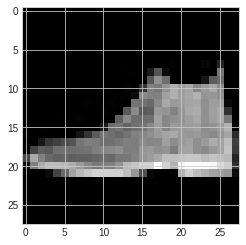

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
test_img=test_images[0]
plt.imshow(test_img,cmap='gray')
plt.show()

In [ ]:
print(test_img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   

In [ ]:
test_images = test_images.reshape(10000, 28, 28, 1)
#test_images=test_images/255.0
test_img=test_images[0]

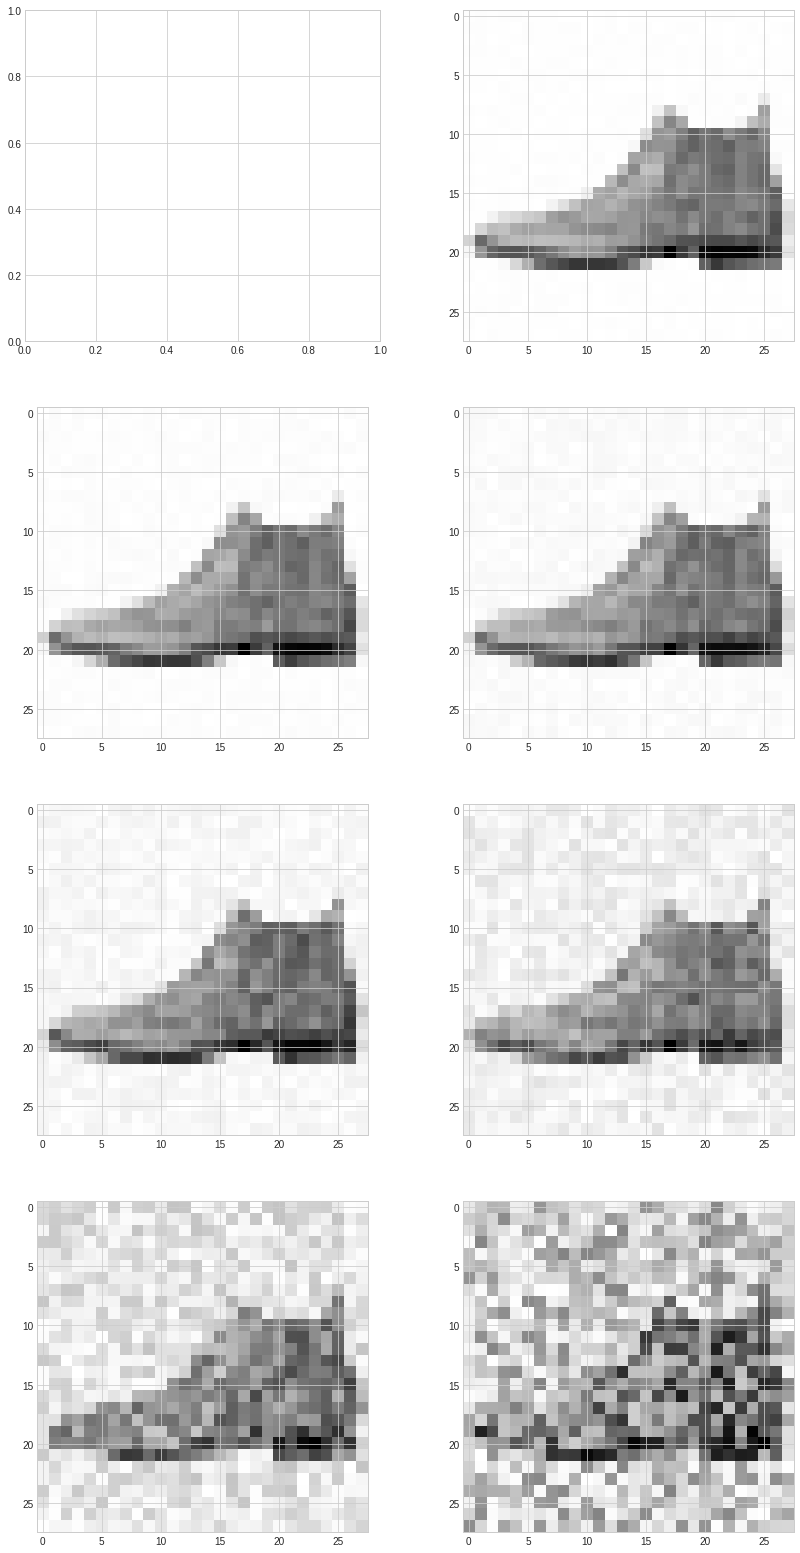

In [ ]:
im_norm = lambda i: (i.astype(np.float32)-i.min()) / (i.max()-i.min())
im=test_img.reshape(28,28)
im_adversarial = lambda pert: im + np.random.uniform(0, pert, size=im.shape)
perturbations = [4, 8, 16, 32, 64, 128, 256]
fig, ax = plt.subplots(4, 2, figsize=(14, 28))

ax = ax.ravel()

for i, perturbation in enumerate(perturbations, 1):
    ax[i].imshow(im_norm(im_adversarial(perturbation)), interpolation='nearest')

**In the above plot we have perturbate the image with different perturbations so every time we predict the modl gives diffrent output in this way we generate the Adversarial Examples that fools machine learning model**

In [ ]:
test=im_norm(im_adversarial(8))
test=test/255
test=test.reshape(-1,28,28,1)
pred=model.predict(test)
label=pred[0]
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]
index=0
max=0
for i in range(0,label.shape[0]):
  if(max<label[i]):
    max=label[i]
    index=i
output=labelNames[index]
print(output)

sandal


**So as we can see we had passed Image of an ankelboot but the output obtained was of sandal so one can run above cell and will get diffrent output every time based on the probability bias that model gives while predicting the class**

#Influential Instances

**Here we had created the dataset that contains number of rooms and price of houses according to respective room**

**Details related to example**

**So here we have created example where house with number of rooms and it's corresponding price is stored**

In [ ]:
import numpy as np
X=[]
y=[]
for j in range(0,100): 
      i=np.random.randint(1, 7) 
      X.append(i)
      i=np.random.randint(1000,5000)
      y.append(i)
for j in range(0,5):
      i=np.random.randint(30,40)
      X.append(i)
      i=np.random.randint(8000,11000)
      y.append(i)     
    
print(X)
print(y)

[2, 6, 4, 3, 1, 5, 3, 4, 5, 3, 4, 3, 4, 4, 3, 1, 6, 2, 1, 4, 6, 5, 3, 3, 1, 6, 2, 2, 2, 5, 1, 4, 1, 6, 6, 3, 6, 3, 6, 1, 1, 1, 4, 2, 6, 4, 4, 2, 1, 5, 5, 2, 5, 6, 2, 2, 1, 6, 3, 5, 1, 2, 3, 6, 4, 6, 6, 2, 2, 4, 5, 3, 4, 3, 6, 1, 2, 1, 2, 2, 6, 3, 2, 2, 4, 4, 5, 2, 6, 4, 3, 5, 5, 5, 1, 2, 5, 5, 5, 2, 38, 31, 32, 30, 32]
[4723, 1652, 4778, 1862, 4189, 2191, 2283, 3155, 2021, 4979, 4189, 2117, 3233, 3271, 3251, 1710, 2177, 2783, 2802, 1670, 4627, 3285, 2457, 2672, 3560, 4555, 3877, 1176, 4108, 3216, 2344, 4301, 2523, 2763, 1961, 2232, 1636, 1921, 3133, 2127, 2093, 3862, 3496, 2677, 4885, 4153, 2369, 1729, 2126, 1496, 2857, 4763, 1293, 1592, 2565, 1098, 1838, 2178, 3212, 1090, 2775, 3087, 3697, 3051, 3955, 3659, 3571, 1314, 1638, 4470, 4847, 4381, 2849, 2600, 1034, 4956, 2494, 1826, 4497, 4868, 4777, 4697, 2117, 3116, 1488, 1383, 4893, 2791, 3501, 3839, 3595, 3970, 1694, 2387, 2110, 4437, 2578, 1664, 3413, 3424, 8184, 10462, 10558, 8802, 8530]


**So the below figure shows the outliers away from boxplot**

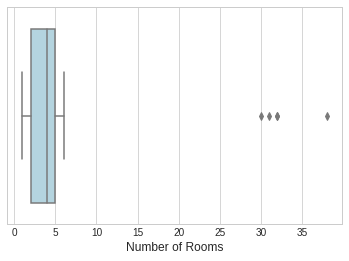

In [ ]:
sns.boxplot(X,color='lightblue')
plt.xlabel('Number of Rooms')
plt.show()

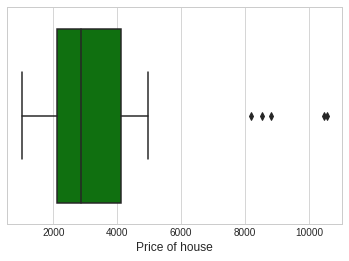

In [ ]:
sns.boxplot(y,color='green')
plt.xlabel('Price of house')
plt.show()

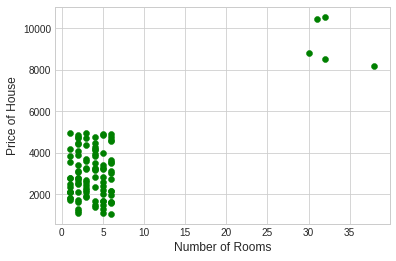

In [ ]:
plt.scatter(X,y,color='green')
plt.xlabel('Number of Rooms')
plt.ylabel('Price of House')
plt.show()

**Finding the mean of Safe points**

**So we find safe points that does'nt influence in model's change in target prediction class**

In [ ]:
a=[]
b=[]
for i in range(len(X)):
  if(i<=99):
    a.append(X[i])
    b.append(y[i])
a=np.array(a)
b=np.array(b)
x_mean=np.mean(a)
y_mean=np.mean(b)
print('Mean Values of normal points :: ',x_mean,y_mean)

Mean Values of normal points ::  3.48 2963.25


**Finding mean of Influential Points that  affect's classifiers accuracy**

In [ ]:
a=[]
b=[]
for i in range(len(X)):
  if(i>99):
    a.append(X[i])
    b.append(y[i])
a=np.array(a)
b=np.array(b)
xo_mean=np.mean(a)
yo_mean=np.mean(b)
print('Mean Values of oulier points :: ',xo_mean,yo_mean)

Mean Values of oulier points ::  32.6 9307.2


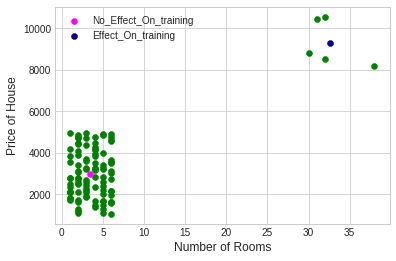

In [ ]:
plt.scatter(X,y,color='green')
plt.scatter(x_mean,y_mean,color='magenta',label='No_Effect_On_training')
plt.scatter(xo_mean,yo_mean,color='darkblue',label='Effect_On_training')
plt.xlabel('Number of Rooms')
plt.ylabel('Price of House')
plt.legend()
plt.show()

**Building Model**

In [ ]:
from sklearn.linear_model import LinearRegression
X=np.asarray(X)
y=np.asarray(y)
X=X.reshape(-1,1)
y=y.reshape(-1,1)
model=LinearRegression(normalize=True)
reg = model.fit(X, y)

In [ ]:
X_pred=[2,4,6]
y_pred=[2860,3012,3169]    
    
print(X_pred)
print(y_pred)

[2, 4, 6]
[2860, 3012, 3169]


In [ ]:
X_pred=np.asarray(X_pred)
X_pred=X_pred.reshape(-1,1)
y_hat=model.predict(X_pred)
print(y_hat)

[[2690.28410741]
 [3091.48788629]
 [3492.69166518]]


**Let's take out model's accuracy**

In [ ]:
y_pred=np.asarray(y_pred)
y_pred=y_pred.reshape(-1,1)
err=np.mean(np.abs(y_hat-y_pred))
print(err)

190.96514802007627


**Now we remove the potential harmful 10 points that we had added and see models performance**

In [ ]:
a=[]
b=[]
for i in range(len(X)):
  if(i<=99):
    a.append(X[i])
    b.append(y[i])
X_safe=np.array(a)
X_safe=X_safe.reshape(-1,1)
y_safe=np.array(b)
y_safe=y_safe.reshape(-1,1)
model2=LinearRegression(normalize=True)
model2.fit(X_safe,y_safe)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
y_hat_safe=model2.predict(X_pred)
print(y_hat_safe)

[[2945.72662909]
 [2969.40686005]
 [2993.08709101]]


In [ ]:
print(y_pred)

[[2860]
 [3012]
 [3169]]


In [ ]:
err=np.mean(np.abs(y_hat_safe-y_pred))
print(err)

101.41089267711489


**So here we can see we got error of 175.5193396413159  in contradiction with error of 216.16176647643792**

**So here we see that model after removing outliers performs better** 

**This error will vary as datapoints are generated at random but we will surely obtain less error that the one we obtained in influential points were there**

# Prototypes And Criticism

**Process to find Prototype**

**A prototype is a data instance that is representative of all the data**

**So here we can find prototype by  K-Means or K-Mediods**

**Here we used K-Mediods to find Prototypes that will represent surrounding data**

**As shown below we will create cluster of 9 diffrent classes so we generate dummy random distribution of 9 classes**

In [ ]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [ ]:
k_mediod=KMedoids(init = "k-medoids++",n_clusters=9,random_state=21)
k_mediod.fit(X)
k_mediod_labels = k_mediod.labels_
k_mediod_labels

array([0, 5, 2, ..., 8, 2, 4])

**Here as there are 9 classes which are randomly formed**

**The below code  shows the centroids of 9 clusters**


In [ ]:
k_mediod_cluster_centers = k_mediod.cluster_centers_
k_mediod_cluster_centers

array([[ 0.62202715,  0.58611261],
       [ 4.09201725,  4.46451389],
       [-1.05658368, -1.07904448],
       [ 1.84799111, -2.33603985],
       [ 2.15296268, -3.66768503],
       [-2.28516579, -0.09450416],
       [ 1.32787152,  1.65276273],
       [ 3.78674887,  3.24504094],
       [-2.44935593, -1.43501087]])

**Plotting each class in cluster**

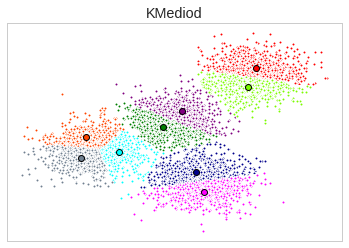

In [ ]:
fig = plt.figure(figsize=(6, 4))
colors = ['g','r','aqua','darkblue','magenta','orangered','purple','lawngreen','slategray']
ax = fig.add_subplot(1, 1, 1)
critic_x={}
critic_y={}
for k, col in zip(range(len(X)), colors):
    
        
        my_members = (k_mediod_labels == k)
        
        cluster_center = k_mediod_cluster_centers[k]
        
        
        ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
        critic_x[k]=X[my_members, 0].tolist()
        critic_y[k]=X[my_members, 1].tolist()
      
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

        

ax.set_title('KMediod')
ax.set_xticks(())
ax.set_yticks(())

plt.show()


**Calculating Critic Points based on the distance from the centroids**

**IF point is far away from centroid it is considered as Critic Point**

In [ ]:
plot_x=[]
plot_y=[]
img_extract=[]
for label in critic_x:
    max_x=0
    max_y=0
    count=0
    for i in range(len(critic_x[label])):
      numx=critic_x[label][i]-k_mediod_cluster_centers[label][0]
      numy=critic_y[label][i]-k_mediod_cluster_centers[label][1]
      if(max_x<numx):
        max_x=numx
        plot_x.append(critic_x[label][i])
        plot_y.append(critic_y[label][i])
        img_extract.append([label,i])

       
       
      if(max_y<numy):
        max_y=numy
        plot_x.append(critic_x[label][i])
        plot_y.append(critic_y[label][i])
        plot_pd[label]=count
        img_extract.append([label,i])

NameError: ignored

**Given below figure shows the critic point in dataset**

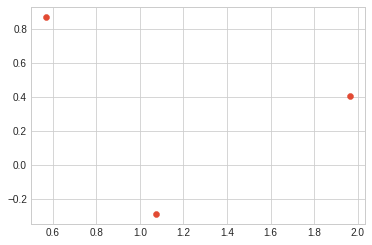

In [ ]:
plt.scatter(plot_x,plot_y)
plt.show()

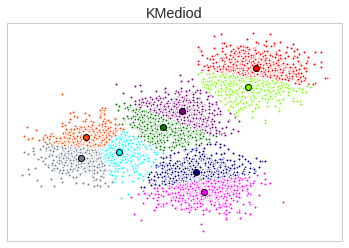

In [ ]:
fig = plt.figure(figsize=(6, 4))
colors = ['g','r','aqua','darkblue','magenta','orangered','purple','lawngreen','slategray']
ax = fig.add_subplot(1, 1, 1)
critic_x={}
critic_y={}
for k, col in zip(range(len(X)), colors):
    
        
        my_members = (k_mediod_labels == k)
        
        cluster_center = k_mediod_cluster_centers[k]
        
        
        ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
        critic_x[k]=X[my_members, 0].tolist()
        critic_y[k]=X[my_members, 1].tolist()
      
        ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

        

ax.scatter(plot_x,plot_y,marker='o',color='deeppink',linewidth=3)#plots critic points
ax.set_title('KMediod')
ax.set_xticks(())
ax.set_yticks(())

plt.show()


**As Shown above the pink circle shows critic points**